## Практическое задание № 1. Классификация  
#### Импортируем все необходимое.

In [15]:
import pandas as pd
from pathlib import Path
import time
from colorama import Fore

#### Считываем данные

In [16]:
def read_data(filename) -> dict:
    path = (Path().absolute()
            .joinpath('data')
            .joinpath(filename))
    
    return pd.read_csv(path)

def load_data(labels_map, file_name) -> (list, list):
    x = read_data(file_name).values[:,:-2]
    y = read_data(file_name)['Activity'].map(labels_map).values
    return x, y

label_map: dict[str, int] = {
    'WALKING':0, 
    'WALKING_UPSTAIRS':1, 
    'WALKING_DOWNSTAIRS':2, 
    'SITTING':3, 
    'STANDING':4, 
    'LAYING':5
}

train_x, train_y = load_data(label_map, 'train.csv')
test_x, test_y = load_data(label_map, 'test.csv')

#### Создаём класс NamedModel для хранения всех полезных данных о модели

In [17]:
class NamedModel:
    def __init__(self, name: str, model: any, color: str, plot_color: str, s):
        self.name = name
        self.model = model
        self.color = color
        self.plot_color = plot_color
        
    def get_title_string(self) -> str:
        return f'{self.color}Next model - {self.name}{Fore.RESET}'
    
    def get_time_string(self, elapsed) -> str:
        return f'{self.color}Elapsed time: {round(elapsed, 3)}{Fore.RESET}'

#### Создаём список моделей

In [18]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

named_models: list[NamedModel] = [
    NamedModel(
        name='SVC,C=50\ndeg=3,k=poly', 
        model=SVC(
            C=50,
            kernel='poly',
        ), 
        color=Fore.BLUE,
        plot_color='steelblue'
    ),
    NamedModel(
        name='SVC,C=50\ndeg=2,k=poly', 
        model=SVC(
            C=50,
            kernel='poly',
            degree=2
        ), 
        color=Fore.BLUE,
        plot_color='steelblue'
    ),
    NamedModel(
        name='SVC,C=50\nk=linear', 
        model=SVC(
            C=50,
            kernel='linear'
        ), 
        color=Fore.BLUE,
        plot_color='steelblue'
    ),
    NamedModel(
        name='SVC,C=50\nk=sigmoid', 
        model=SVC(
            C=50,
            kernel='sigmoid',
        ), 
        color=Fore.BLUE,
        plot_color='steelblue'
    ),
    NamedModel(
        name='SVC,C=50\nk=rbf', 
        model=SVC(
            C=50
        ), 
        color=Fore.BLUE,
        plot_color='steelblue'
    ),
    NamedModel(
        name='SVC,C=1\nk=rbf', 
        model=SVC(), 
        color=Fore.BLUE,
        plot_color='steelblue'
    ),
    NamedModel(
        name='RF\nn=10', 
        model=RandomForestClassifier(
            n_estimators=10, 
            max_depth=5
        ), 
        color=Fore.GREEN,
        plot_color='forestgreen'
    ),
    NamedModel(
        name='RF\nn=150', 
        model=RandomForestClassifier(
            n_estimators=150, 
            max_depth=5
        ), 
        color=Fore.GREEN,
        plot_color='forestgreen'
    ),
    NamedModel(
        name='KNN', 
        model=KNeighborsClassifier(n_neighbors=6),
        color=Fore.YELLOW,
        plot_color='y'
    ),
    NamedModel(
        name='DT', 
        model=DecisionTreeClassifier(max_depth=5), 
        color=Fore.CYAN,
        plot_color='teal'
    ),
]   

#### Обучение моделей на train датасете

In [19]:
for named_model in named_models:
    print(named_model.get_title_string())
    start_time = time.time()
    named_model.model.fit(train_x, train_y)
    print(named_model.get_time_string(time.time() - start_time))

Next model - SVC,C=50
deg=3,k=poly
Elapsed time: 0.411
Next model - SVC,C=50
deg=2,k=poly
Elapsed time: 0.386
Next model - SVC,C=50
k=linear
Elapsed time: 0.558
Next model - SVC,C=50
k=sigmoid
Elapsed time: 0.7
Next model - SVC,C=50
k=rbf
Elapsed time: 0.448
Next model - SVC,C=1
k=rbf
Elapsed time: 0.702
Next model - RF
n=10
Elapsed time: 0.586
Next model - RF
n=150
Elapsed time: 7.529
Next model - KNN
Elapsed time: 0.085
Next model - DT
Elapsed time: 1.773


#### Тест моделей и вывод результатов

In [20]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# class to collect result reports
class ResultsReport:
    def __init__(self, actual: list, predictions: list, m: NamedModel, elapsed: float):
        self.precision = precision_score(actual, result, average='weighted')
        self.recall = recall_score(actual, predictions, average='weighted')
        self.f1 = f1_score(actual, predictions, average='weighted')
        self.time = elapsed
        self.color = m.plot_color
        self.name = m.name
            
# print large report
target_names = ['Walking', 'Walking Upstairs', 'Walking Downstairs', 'Sitting', 'Standing', ' ']
def print_report(actual, predictions, color) -> None:
    report_string = classification_report(actual, predictions, target_names=target_names)
    print(color + report_string + Fore.RESET)

reports: list[ResultsReport] = [] ## list with our results
for named_model in named_models:
    print(named_model.get_title_string())
    
    start_time = time.time()
    result = named_model.model.predict(test_x) # make predictions
    elapsed_time = time.time() - start_time
    print(named_model.get_time_string(elapsed_time))
    
    reports.append(ResultsReport(test_y, result, named_model, elapsed_time))

    print_report(test_y, result, named_model.color)

Next model - SVC,C=50
deg=3,k=poly
Elapsed time: 0.221
                    precision    recall  f1-score   support

           Walking       0.95      0.98      0.97       496
  Walking Upstairs       0.96      0.96      0.96       471
Walking Downstairs       0.99      0.96      0.98       420
           Sitting       0.98      0.91      0.94       491
          Standing       0.92      0.98      0.95       532
                         1.00      1.00      1.00       537

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947

Next model - SVC,C=50
deg=2,k=poly
Elapsed time: 0.21
                    precision    recall  f1-score   support

           Walking       0.96      0.99      0.98       496
  Walking Upstairs       0.97      0.96      0.97       471
Walking Downstairs       0.99      0.97      0.98       420
           Sitting       0.97      0.89      0.

#### Построение графиков

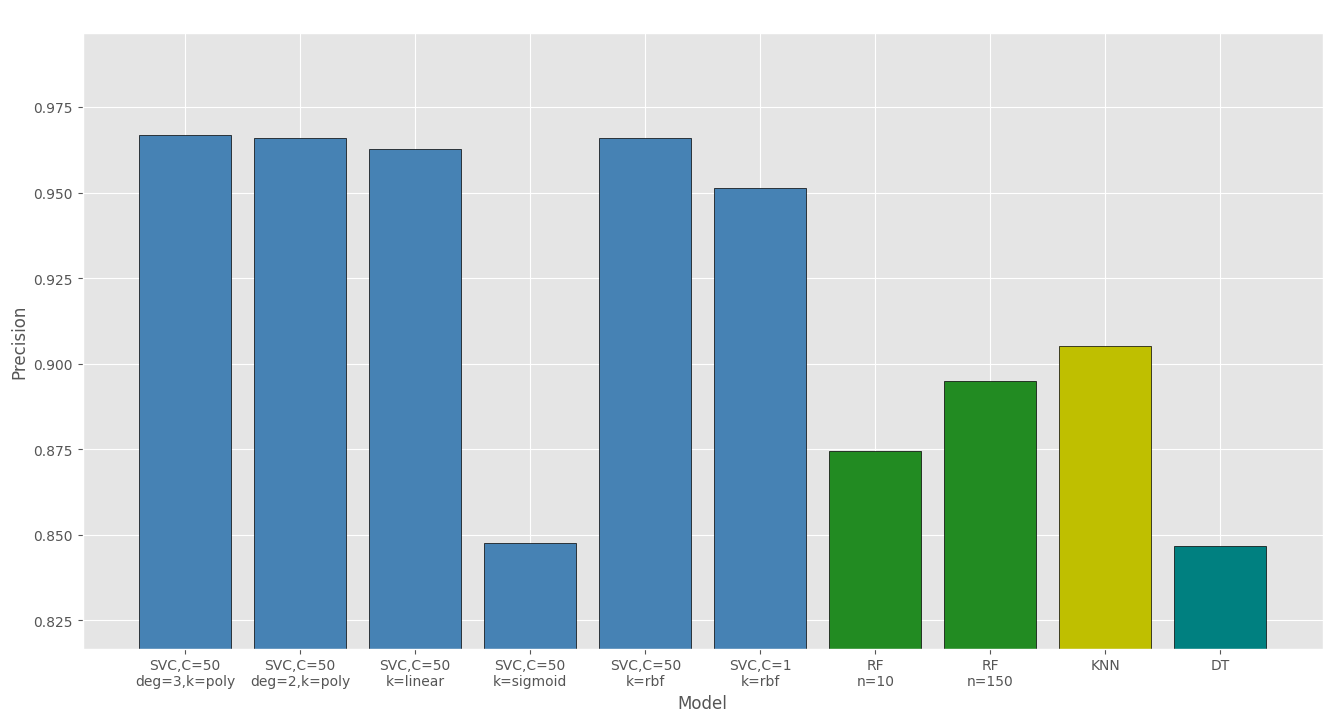

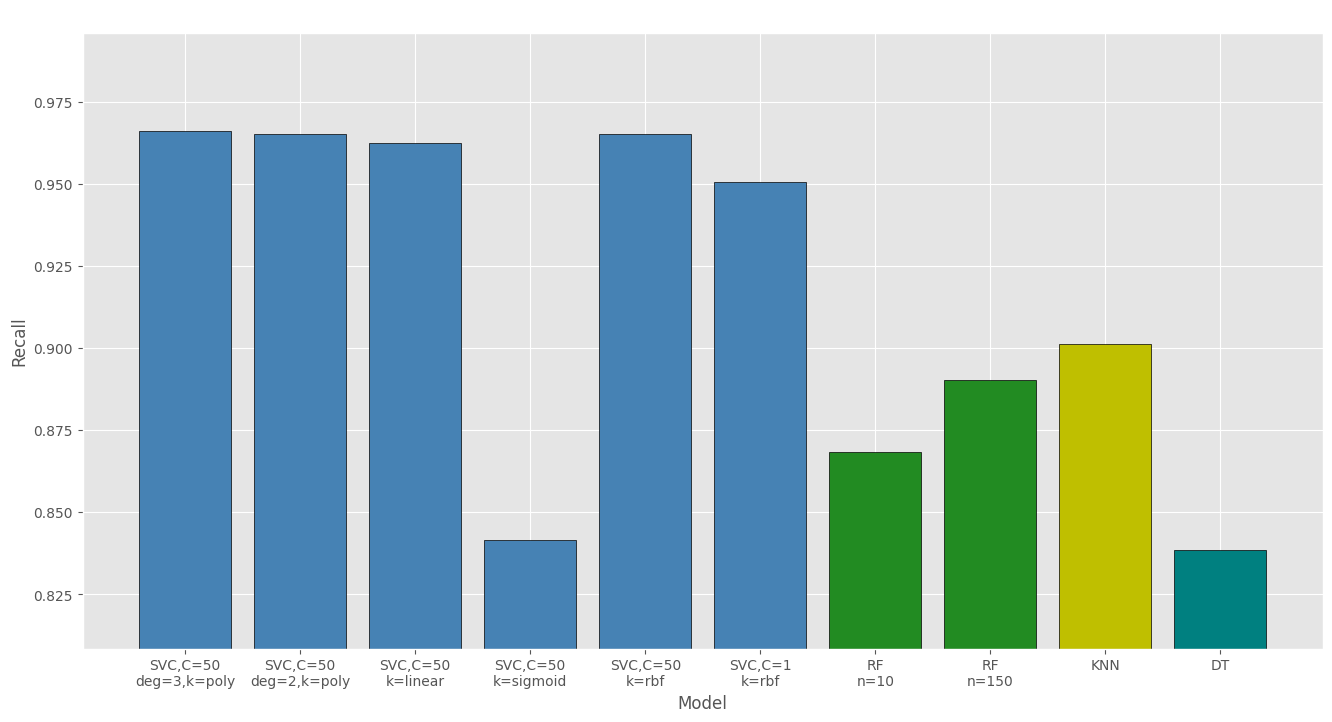

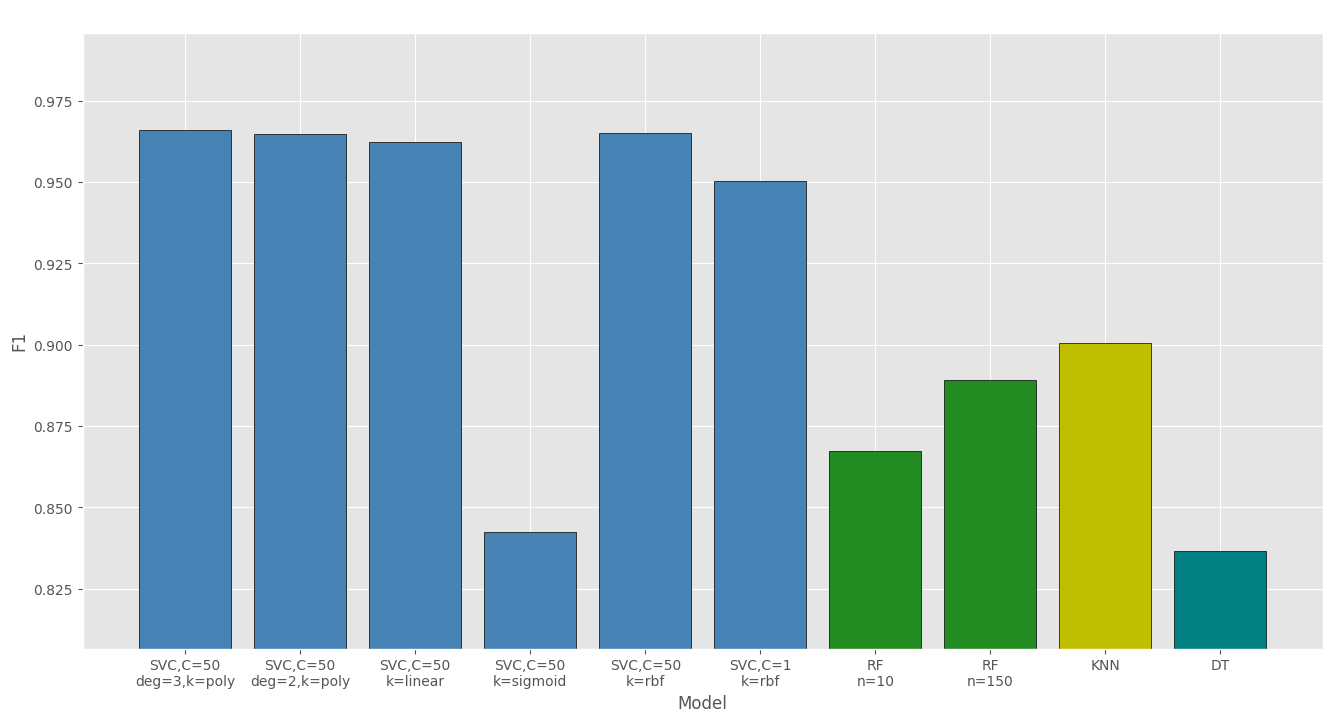

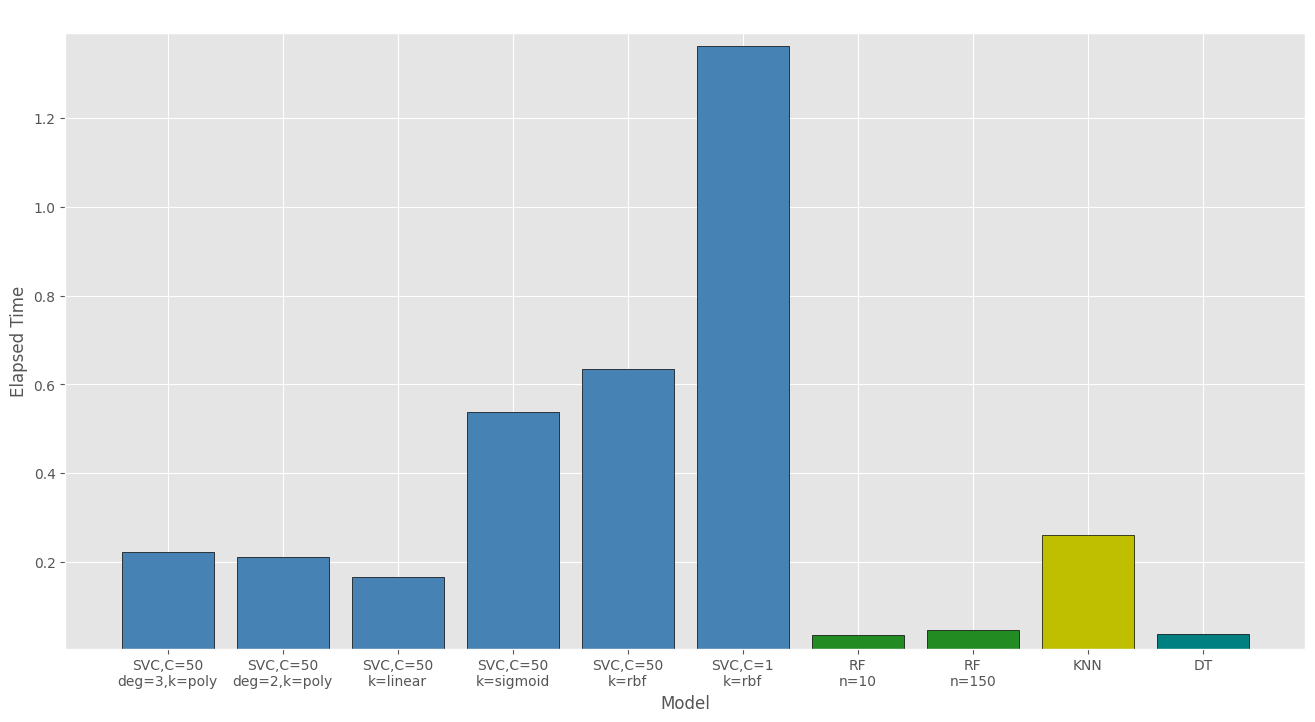

In [21]:
import matplotlib.pyplot as plt

def build_report_plot(values: list, title: str) -> None:
    plt.style.use('ggplot')
    plt.figure(figsize=(16, 8))
    plt.bar(names, values, color=colors, edgecolor='black')

    plt.title(title)
    plt.xlabel('Model')
    plt.ylabel(title)
    
    min_value = min(values)
    max_value = max(values)
    plt.ylim(min_value - 0.03, max_value + 0.03)
    
    plt.show()

names = list(map(lambda nm: nm.name, reports))
colors = list(map(lambda nm: nm.color, reports))

build_report_plot(list(map(lambda nm: nm.precision, reports)), 'Precision')
build_report_plot(list(map(lambda nm: nm.recall, reports)), 'Recall')
build_report_plot(list(map(lambda nm: nm.f1, reports)), 'F1')
build_report_plot(list(map(lambda nm: nm.time, reports)), 'Elapsed Time')

## Выводы
#### Из графиков видно, что все используемые модели показали хорошую точность, но лучшая получается при использовании ```SVC``` с высоким значением параметра ```C```. С точки зрения производительности лучше всего показал себя ```Random Forest```. Лучшим компромиссным решением является ```SVC``` с высоким значением ```C``` и ядром ```poly``` или ```linear```. Хуже всего проявили себя модели ```KNN``` и ```Decision Tree```.
### В чем разница между показателями ```precision``` и ```recall```?
#### ```Precision``` (точность) показывает, какой процент из всех положительных прогнозов модели оказался правильным.
#### ```Recall``` (полнота) показывает, какой процент из всех положительных примеров в тестовой выборке был правильно классифицирован моделью. Другими словами, это отношение количества истинно положительных прогнозов к общему количеству положительных примеров в тестовой выборке.
### Что такое показатель ```F1```?
#### Показатель ```F1``` - это среднее гармоническое между точностью (precision) и полнотой (recall) классификационной модели. 
#### $F1=2* \frac{precision * recall}{precision + recall}$
### Что такое гиперпараметры модели машинного обучения (МО)?
#### Гиперпараметми модели машинного обучения называют параметры, которые определяют структуру и поведение модели, но не являются частью обучаемых параметров модели. Другими словами, гиперпараметры — это параметры, которые устанавливаются до обучения модели и не изменяются во время обучения, как бы её настройка.
### Опишите влияние гиперпараметров в выбранных вами моделях МО.
#### Для ```SVC```:
- ```kernel``` - тип ядра, которое используется для преобразования данных в более высокомерное пространство.
    - ```linear``` - линейное ядро, которое подходит для линейно разделимых данных.
    - ```poly``` - полиномиальное ядро, которое подходит для данных с нелинейными отношениями.
    - ```rbf``` - радиальное базисное ядро, которое подходит для данных с нелинейными отношениями и высокими размерностями.
    - ```sigmoid``` - сигмоидальное ядро, которое подходит для данных с нелинейными отношениями и высокими размерностями.
- ```C``` - высокие значения приводят к более сложной модели и более высокой точности классификации, но также увеличивают риск переобучения, а низкие приводят к более простой модели и более низкой точности классификации.
- ```degree``` - степень многочлена, если используется ядро ```poly```. Насколько я понял значение должно быть подобрано в зависимости от данных для лучшей точности.
#### Для ```Random Forest```:
- ```n_estimators``` - количество деревьев в лесу, влияние аналогично параметру ```C``` для ```SVC```.
- ```max_depth``` - максимальная глубина дерева, влияние снова аналогично параметру ```C``` для ```SVC```.
#### Для ```KNN```:
- ```n_neighbors``` - количество ближайших соседей, влияние аналогично параметру ```C``` для ```SVC```.
- ```weights``` - тип весов, которые используются для ближайших соседей.
    - ```uniform``` - равные веса для всех соседей.
    - ```distance``` - веса, обратно пропорциональные расстоянию до соседей.